In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:

def hessian_matrix(image, sigma=1.0):
    """计算图像的Hessian矩阵，返回图像的二阶导数"""
    # 计算图像的梯度
    Ixx = cv2.GaussianBlur(image, (0, 0), sigma, sigma, borderType=cv2.BORDER_REPLICATE)
    Iyy = cv2.GaussianBlur(image, (0, 0), sigma, sigma, borderType=cv2.BORDER_REPLICATE)
    Ixy = cv2.GaussianBlur(image, (0, 0), sigma, sigma, borderType=cv2.BORDER_REPLICATE)
    
    Ixx = cv2.Sobel(Ixx, cv2.CV_64F, 2, 0, ksize=3)
    Iyy = cv2.Sobel(Iyy, cv2.CV_64F, 0, 2, ksize=3)
    Ixy = cv2.Sobel(Ixy, cv2.CV_64F, 1, 1, ksize=3)
    
    return Ixx, Iyy, Ixy

def compute_frangi_filter(image, sigma=1.0, beta=0.5, c=15.0):
    """Frangi血管增强方法"""
    Ixx, Iyy, Ixy = hessian_matrix(image, sigma)
    
    # 计算Hessian矩阵的特征值
    trace = Ixx + Iyy
    determinant = Ixx * Iyy - Ixy * Ixy
    
    # 特征值（lambda1 和 lambda2）
    lambda1 = 0.5 * (trace - np.sqrt(trace**2 - 4 * determinant))
    lambda2 = 0.5 * (trace + np.sqrt(trace**2 - 4 * determinant))
    
    # 计算局部的血管增强
    Rb = np.sqrt(lambda1**2 + lambda2**2)
    S = np.abs(lambda1) * np.abs(lambda2)
    
    # Frangi增强图像
    vesselness = (1 - np.exp(-Rb**2 / (2 * c**2))) * np.exp(-S / (2 * beta**2))
    
    return vesselness



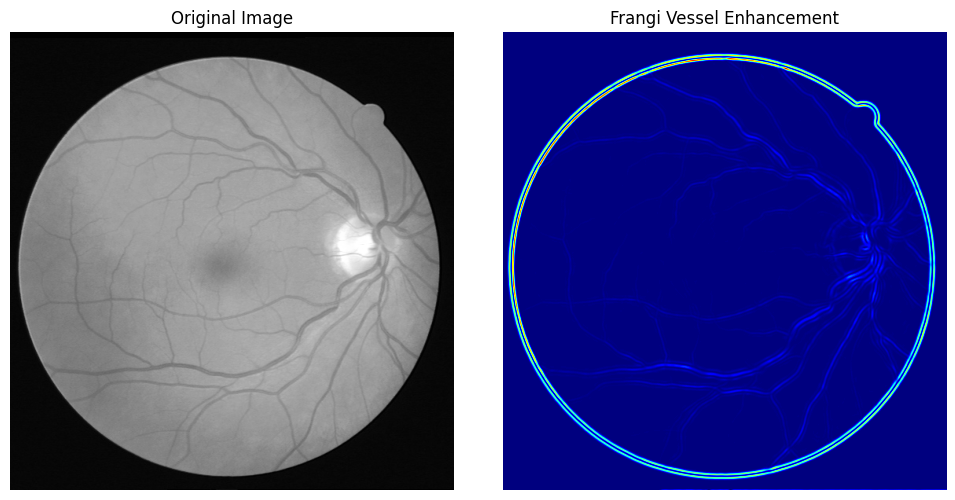

In [ ]:
def main():
    # 读取图像
    image = cv2.imread('IMG/C.png', cv2.IMREAD_GRAYSCALE)
    
    # 对图像进行归一化
    image = image.astype(np.float64) / 255.0
    
    # 使用Frangi增强
    enhanced_image = compute_frangi_filter(image, sigma=2.0, beta=0.5, c=15.0)
    
    # 显示原始图像和增强图像
    plt.figure(figsize=(10, 5))

    # 原始图像
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')  # 关闭坐标轴

    # 增强后的Frangi图像
    plt.subplot(1, 2, 2)
    plt.imshow(enhanced_image, cmap='jet')
    plt.title('Frangi Vessel Enhancement')
    plt.axis('off')  # 关闭坐标轴

    # 显示图像
    plt.tight_layout()
    plt.show()

    # 保存图像
    

if __name__ == '__main__':
    main()
